## Introduction

The aim of the project is to examine how the global community's attitude towards China and the USA has changed over the past 10 years (i.e., from 2013 to 2023). Sentiment analysis was conducted using tweets gathered using the snscrape library. Each country was analyzed based on approximately 96,000 tweets collected using the hashtags #america and #china.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download("all")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Sentiment Analysis

#### NLTK Vader

In [2]:
# create preprocess_text function
def preprocess_text(text):
    str_processed = re.sub(r'\s+', ' ', text.lower().strip())

    # Tokenize the text
    tokens = word_tokenize(str_processed)

    # Remove stop words
    stop_words = stopwords.words('english')
    stop_words.extend(['https', 'http', 'co', 'amp', 'rt', '#', '@'])
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [3]:
china_tweets_df = pd.read_csv('china_tweets.csv')
china_tweets_df['Content'] = china_tweets_df['Content'].astype(str)
china_tweets_df['Content'] = china_tweets_df['Content'].apply(preprocess_text)

In [4]:
usa_tweets_df = pd.read_csv('usa_tweets.csv')
usa_tweets_df['Content'] = usa_tweets_df['Content'].astype(str)
usa_tweets_df['Content'] = usa_tweets_df['Content'].apply(preprocess_text)

In [5]:
def get_sentiment(text):

    def polarity_score(compound):
        if compound >= 0.05:
            return "positive"
        elif compound <= -0.05:
            return "negative"
        elif compound > -0.05 and compound < 0.05:
            return "neutral"
    
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    return polarity_score(compound)

In [6]:
china_tweets_df['Sentiment'] = china_tweets_df['Content'].apply(get_sentiment)

In [7]:
def remove_obvious_words(df, country):
    if country == 'china':
        del_words = [' china', 'china ', ' china ', ' chinese ', "n 't", "'s ", ' u ']
    elif country == 'usa':
        del_words = [' america', 'america ', ' america ', ' american ', 'usa ', ' usa', ' usa ', "n 't", "'s ", ' u ']

    for word in del_words:
        df.loc[:, 'Content'] = df['Content'].str.replace(word, '')

    return df

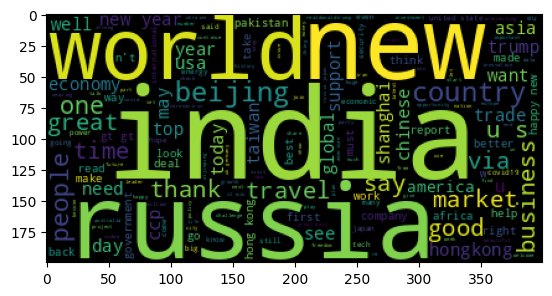

In [8]:
positive_tweets = china_tweets_df[china_tweets_df['Sentiment'] == 'positive']
positive_tweets = remove_obvious_words(positive_tweets, 'china')
wordcloud = WordCloud().generate(' '.join(positive_tweets['Content']))
plt.imshow(wordcloud);

#### China and characteristic words for positive tweets:
- new year
- travel
- market
- business
- trade
- world

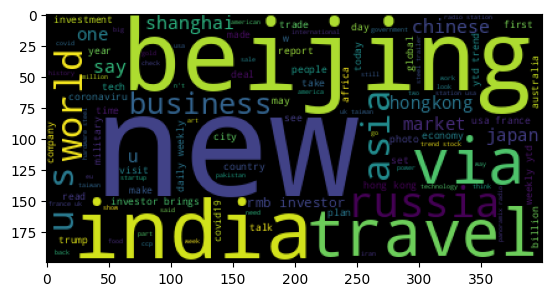

In [9]:
neutral_tweets = china_tweets_df[china_tweets_df['Sentiment'] == 'neutral']
neutral_tweets = remove_obvious_words(neutral_tweets, 'china')
wordcloud = WordCloud().generate(' '.join(neutral_tweets['Content']))
plt.imshow(wordcloud);

#### China and characteristic words for neutral tweets:
- market
- china travel
- beijing
- investor
- india

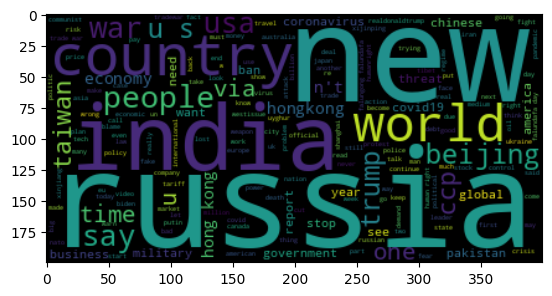

In [10]:
negative_tweets = china_tweets_df[china_tweets_df['Sentiment'] == 'negative']
negative_tweets = remove_obvious_words(negative_tweets, 'china')
wordcloud = WordCloud().generate(' '.join(negative_tweets['Content']))
plt.imshow(wordcloud, interpolation='bilinear');

#### China and characteristic words for negative tweets:
- taiwan
- usa
- russia
- coronavirus
- hongkong
- war
- covid
- ccp

In [11]:
usa_tweets_df['Sentiment'] = usa_tweets_df['Content'].apply(get_sentiment)

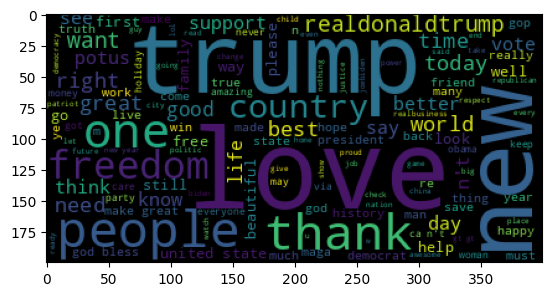

In [12]:
positive_tweets = usa_tweets_df[usa_tweets_df['Sentiment'] == 'positive']
positive_tweets = remove_obvious_words(positive_tweets, 'usa')
wordcloud = WordCloud().generate(' '.join(positive_tweets['Content']))
plt.imshow(wordcloud);

#### USA and characteristic words for positive tweets:
- freedom 
- trump 
- vote
- support
- love

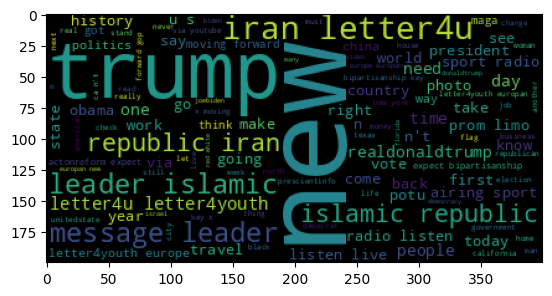

In [13]:
neutral_tweets = usa_tweets_df[usa_tweets_df['Sentiment'] == 'neutral']
neutral_tweets = remove_obvious_words(neutral_tweets, 'usa')
wordcloud = WordCloud().generate(' '.join(neutral_tweets['Content']))
plt.imshow(wordcloud);

#### USA and characteristic words for neutral tweets:
- trump
- message 
- leader
- islamic
- europe 

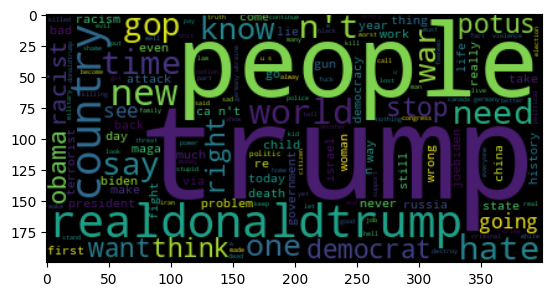

In [14]:
negative_tweets = usa_tweets_df[usa_tweets_df['Sentiment'] == 'negative']
negative_tweets = remove_obvious_words(negative_tweets, 'usa')
wordcloud = WordCloud().generate(' '.join(negative_tweets['Content']))
plt.imshow(wordcloud, interpolation='bilinear');

#### USA and characteristic words for negative tweets:
- trump
- obama
- gop
- democrat 
- potus
- maga
- racist

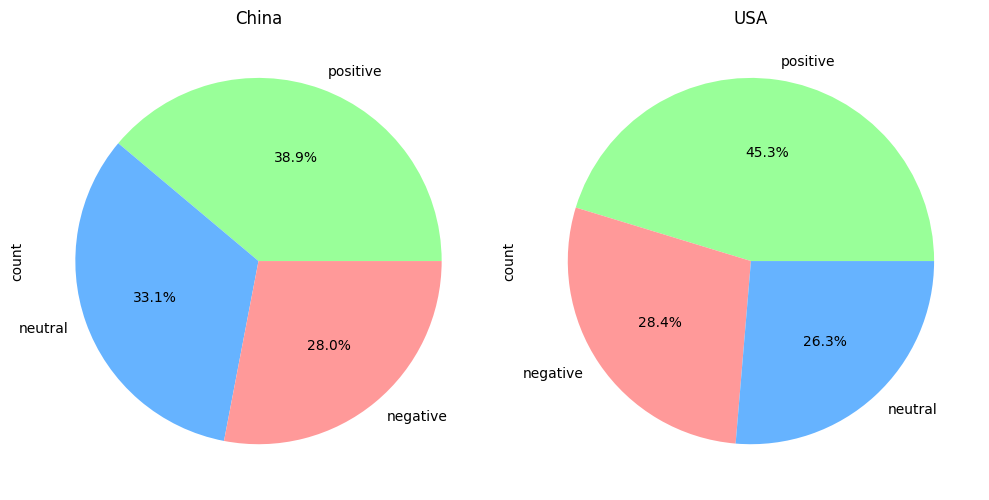

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

china_tweets_df.value_counts('Sentiment').plot.pie(autopct='%1.1f%%', ax=ax[0], colors=['#99ff99','#66b3ff','#ff9999']);
ax[0].set_title('China')

usa_tweets_df.value_counts('Sentiment').plot.pie(autopct='%1.1f%%', ax=ax[1], colors=['#99ff99','#ff9999','#66b3ff']);
ax[1].set_title('USA')

plt.tight_layout()
plt.show()

### Conclusions:
* USA had a greater number of positive tweets. (6 p.p. difference)
* The number of negative tweets was the same for both countries.
* China had a greater number of neutral tweets. (6 p.p. difference)

## BERT Positive/Negative Model

In [ ]:
from transformers import pipeline

# create a sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", device=0) # < 0 means CPU, >= 0 means GPU

# classify some text
def bert_sentiment(text):
    result = nlp(text)[0]
    sentiment = result['label']
    return sentiment

In [ ]:
china_tweets_df['Bert_Sentiment'] = china_tweets_df['Content'].apply(bert_sentiment)

In [ ]:
usa_tweets_df['Bert_Sentiment'] = usa_tweets_df['Content'].apply(bert_sentiment)

In [19]:
china_tweets_df.to_csv('china_tweets_sentiment.csv', index=False)

In [20]:
usa_tweets_df.to_csv('usa_tweets_sentiment.csv', index=False)

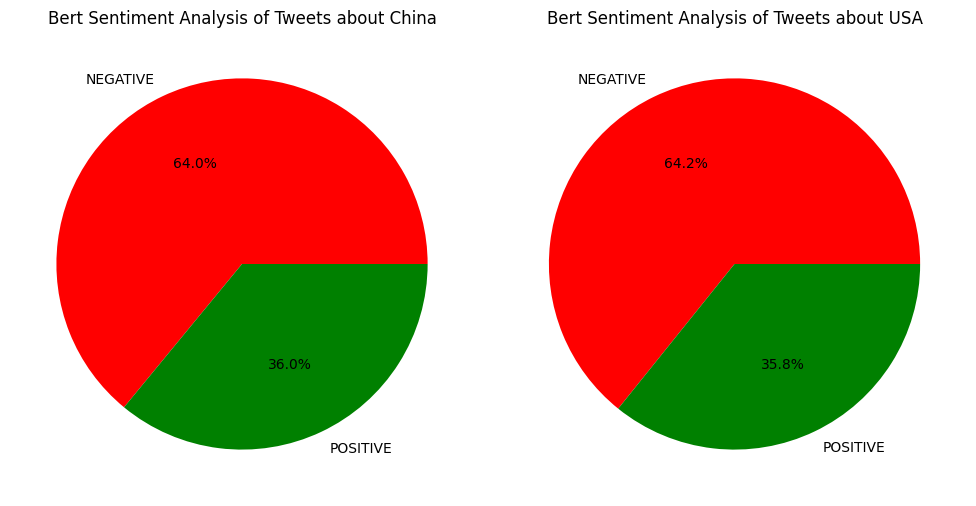

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

china_tweets_df.value_counts('Bert_Sentiment').plot.pie(autopct='%1.1f%%', ax=ax[0], ylabel='', colors=['red', 'green']);
ax[0].set_title('Bert Sentiment Analysis of Tweets about China')

usa_tweets_df.value_counts('Bert_Sentiment').plot.pie(autopct='%1.1f%%', ax=ax[1], ylabel='', colors=['red', 'green']);
ax[1].set_title('Bert Sentiment Analysis of Tweets about USA')

plt.tight_layout()
plt.show()

### Bert Emotion Model

In [ ]:
emotion_classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', device=0)

def bert_sentiment_emotion(text):
    result = emotion_classifier(text)[0]
    emotion = result['label']
    return emotion

china_tweets_df = pd.read_csv('china_tweets_sentiment.csv')
usa_tweets_df = pd.read_csv('usa_tweets_sentiment.csv')
china_tweets_df['Content'] = china_tweets_df['Content'].astype(str)
usa_tweets_df['Content'] = usa_tweets_df['Content'].astype(str)

china_tweets_df['Bert_Emotion'] = china_tweets_df['Content'].apply(bert_sentiment_emotion)
usa_tweets_df['Bert_Emotion'] = usa_tweets_df['Content'].apply(bert_sentiment_emotion)

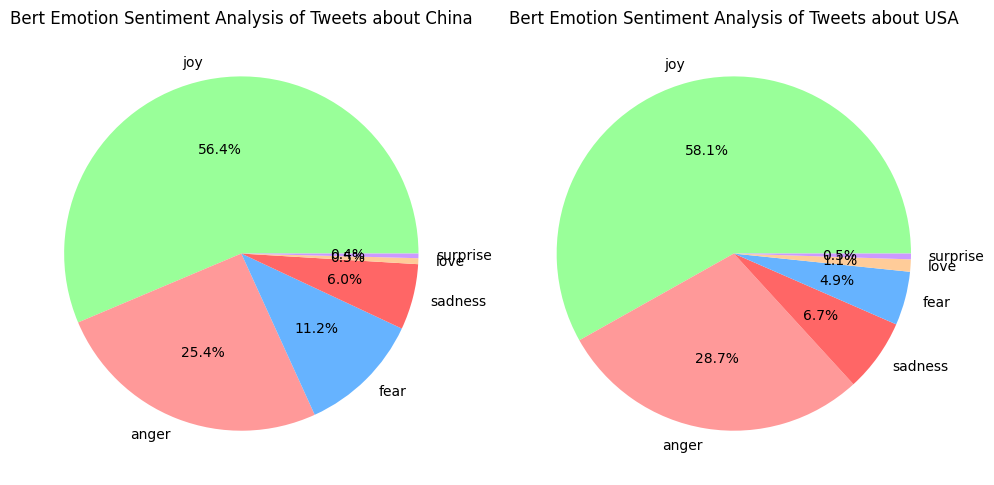

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

china_tweets_df.value_counts('Bert_Emotion').plot.pie(autopct='%1.1f%%', ax=ax[0], colors=['#99ff99','#ff9999', '#66b3ff', '#ff6666', '#ffcc99', '#cc99ff'], ylabel='');
ax[0].set_title('Bert Emotion Sentiment Analysis of Tweets about China')

usa_tweets_df.value_counts('Bert_Emotion').plot.pie(autopct='%1.1f%%', ax=ax[1], colors=['#99ff99', '#ff9999', '#ff6666', '#66b3ff', '#ffcc99', '#cc99ff'], ylabel='');
ax[1].set_title('Bert Emotion Sentiment Analysis of Tweets about USA')

plt.tight_layout()
plt.show()

#### Conclusions:
- in tweets about China, tweets classified as 'fear' appeared over twice as frequently.
- in tweets about the US, the number of tweets indicating 'anger' was slighlty higher (over 3 p.p. difference)

### Time Series Analysis

In [58]:
def time_series_anlysis_bar_chart(df):
    copy_df = df.copy()
    copy_df['Datetime'] = pd.to_datetime(copy_df['Datetime'], errors='coerce')
    copy_df = copy_df.dropna()   
    copy_df['Year'] = copy_df['Datetime'].dt.year

    sentiment_yearly = copy_df.groupby('Year')['Sentiment'].value_counts().unstack().fillna(0)
    bert_sentiment_yearly = copy_df.groupby('Year')['Bert_Sentiment'].value_counts().unstack().fillna(0)
    bert_emotion = copy_df.groupby('Year')['Bert_Emotion'].value_counts().unstack().fillna(0)
    
    fig, ax = plt.subplots(3, 1, figsize=(10, 10))

    sentiment_yearly.plot(kind='bar', stacked=True, ax=ax[0])
    ax[0].set_title('Yearly Sentiment Distribution')
    ax[0].set_ylabel('Tweets')

    bert_sentiment_yearly.plot(kind='bar', stacked=True, ax=ax[1])
    ax[1].set_title('Yearly Bert Sentiment Distribution')
    ax[1].set_ylabel('Tweets')

    bert_emotion.plot(kind='bar', stacked=True, ax=ax[2])
    ax[2].set_title('Yearly Bert Emotion Distribution')
    ax[2].set_ylabel('Tweets')

    plt.tight_layout()
    plt.show()

def time_series_analysis_line_chart(df):
    copy_df = df.copy()
    copy_df['Datetime'] = pd.to_datetime(copy_df['Datetime'], errors='coerce')
    copy_df = copy_df.dropna()   
    copy_df['Year'] = copy_df['Datetime'].dt.year
    
    sentiment_yearly = copy_df.groupby('Year')['Sentiment'].value_counts().unstack().fillna(0)
    bert_sentiment_yearly = copy_df.groupby('Year')['Bert_Sentiment'].value_counts().unstack().fillna(0)
    bert_emotion = copy_df.groupby('Year')['Bert_Emotion'].value_counts().unstack().fillna(0)

    fig, ax = plt.subplots(3, 1, figsize=(10, 10))

    sentiment_yearly.plot(kind='line', ax=ax[0])
    ax[0].set_title('Yearly Sentiment Distribution')
    ax[0].yaxis.set_ticklabels([])
    ax[0].grid(True)

    bert_sentiment_yearly.plot(kind='line', ax=ax[1])
    ax[1].set_title('Yearly Bert Sentiment Distribution')
    ax[1].yaxis.set_ticklabels([])
    ax[1].grid(True)

    bert_emotion.plot(kind='line', ax=ax[2])
    ax[2].set_title('Yearly Bert Emotion Distribution')
    ax[2].yaxis.set_ticklabels([])

    plt.tight_layout()
    plt.show()

### China Time Series Analysis

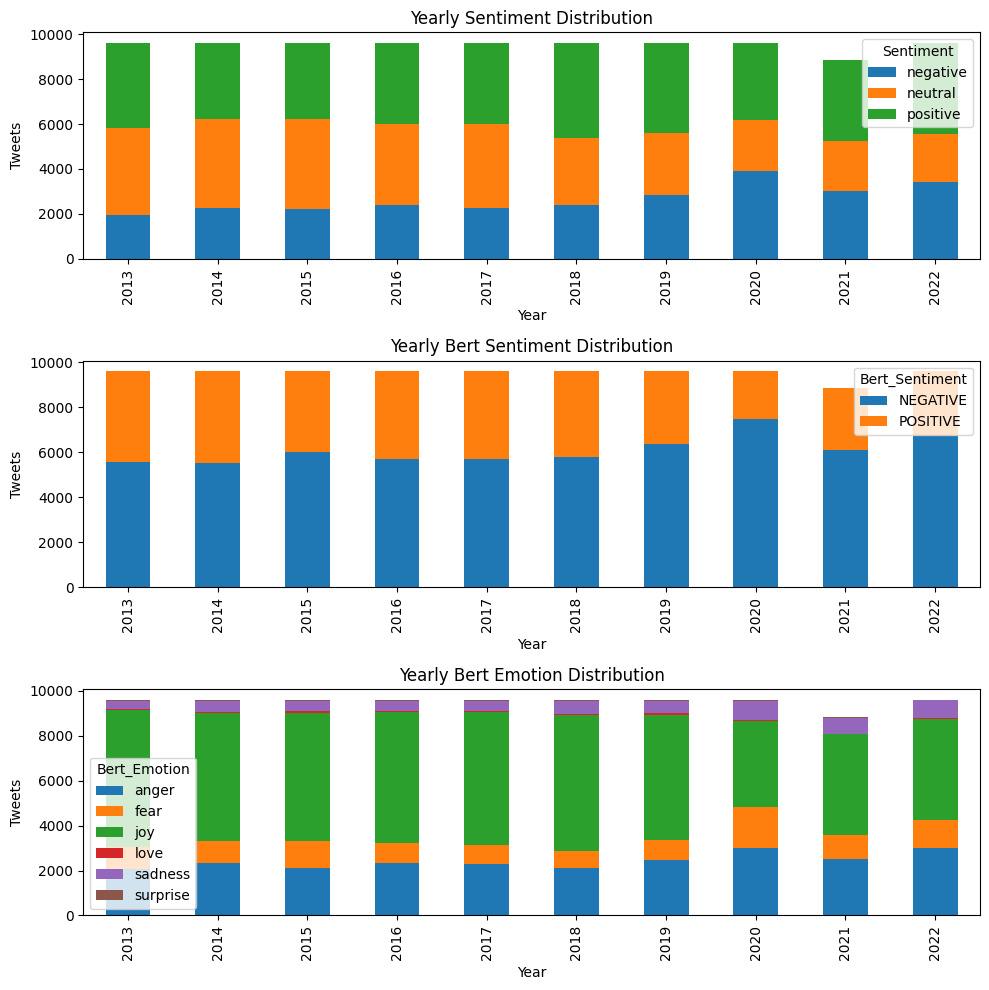

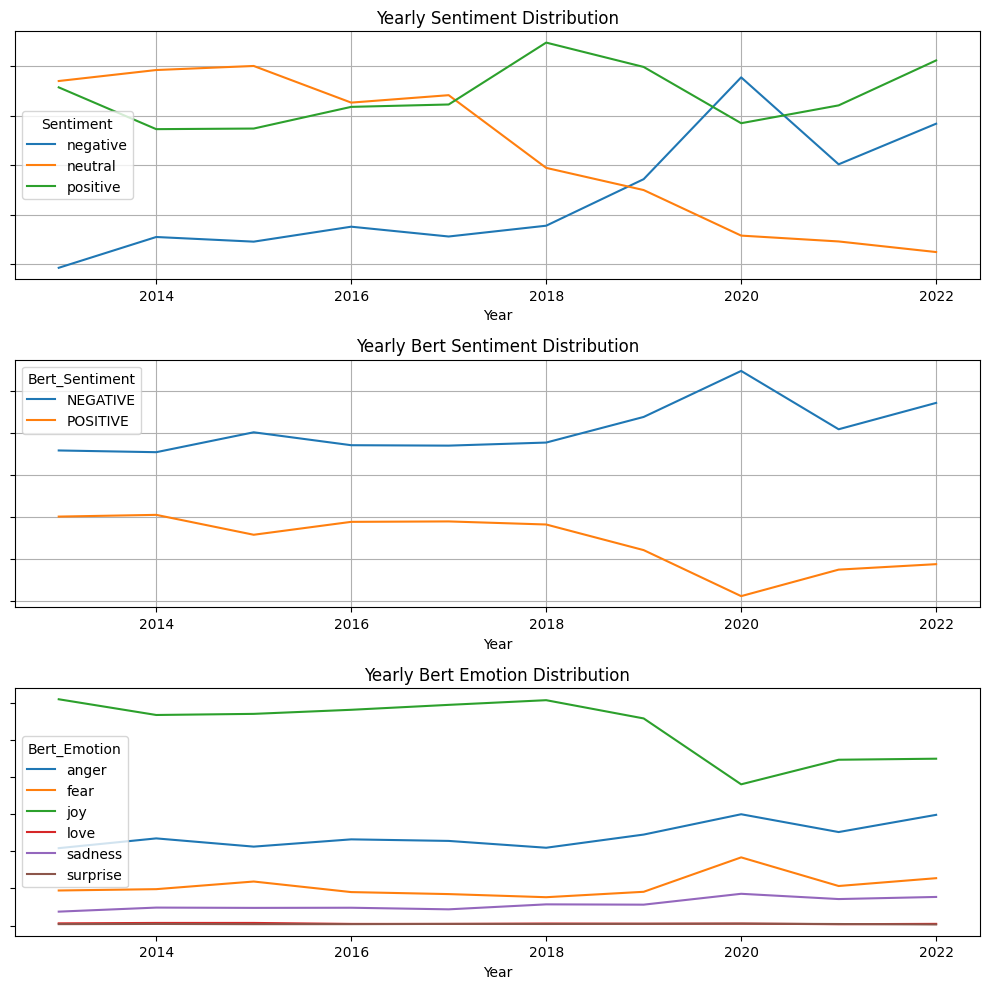

In [59]:
time_series_anlysis_bar_chart(china_tweets_df)
time_series_analysis_line_chart(china_tweets_df)

#### Conclusions:
* Over time, the number of neutral tweets slightly decreased.
* From 2018 to 2020, the number of negative tweets increased (possibly due to the pre-election and presidential campaigns in the USA, with both candidates having strong anti-Chinese stances, and Trump's policies towards China?). However, it significantly declined in 2021 (potentially due to moderation related to the pandemic or the end of the campaigns?).
* After 2018, the number of tweets marked as 'joy' declined at the expense of tweets marked as 'anger' and 'fear'.

### USA Time Series Analysis

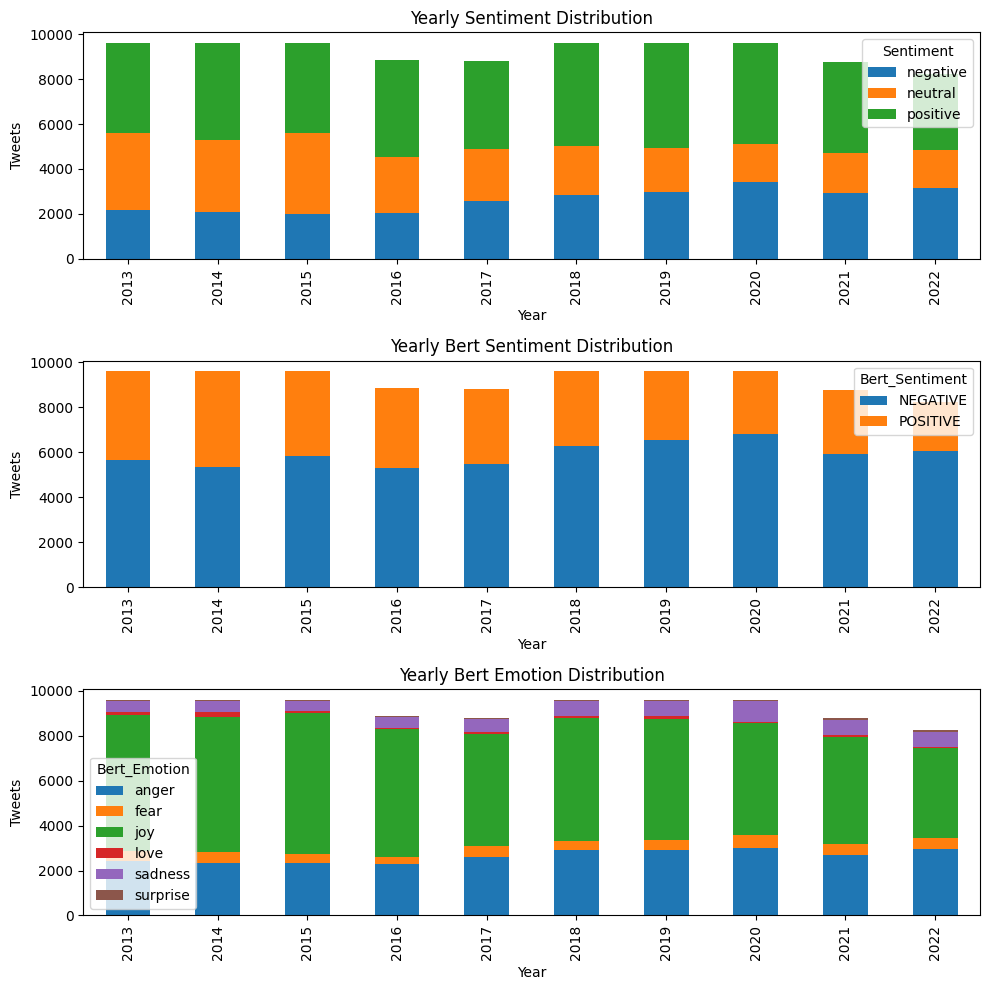

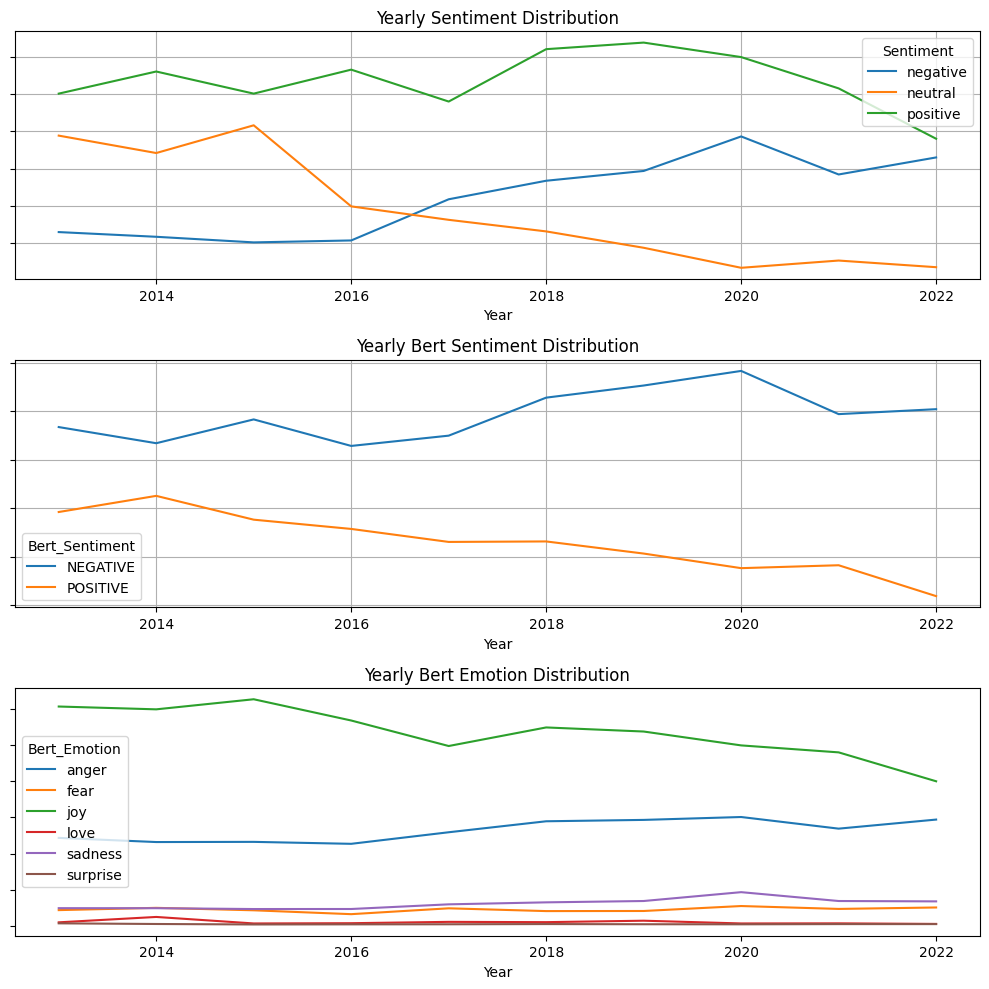

In [60]:
time_series_anlysis_bar_chart(usa_tweets_df)
time_series_analysis_line_chart(usa_tweets_df)

#### Conclusions:
* There is significantly fewer number of tweets with a neutral character compared to China.
* Since 2015, the number of neutral tweets has been decreasing.
* From 2016 to 2020 (during the first term of Trump's presidency?), the number of negative tweets increased, but it declined in 2021 (possibly due to moderation related to the pandemic?). However, these increases and decreases were smaller than those observed in the case of China.
* The number of tweets classified as 'joy' has been consistently decreasing since 2013, while the number of tweets marked as 'anger' has been rising.

### Bibliografia
https://www.datacamp.com/tutorial/text-analytics-beginners-nltk \
https://huggingface.co/transformers/v3.0.2/main_classes/pipelines.html